# Project Instruction

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service). You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- Complete all of the tasks. 
- Make sure your code is readable, organised, and commented appropriately.

# Project Instruction

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service). You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- Complete all of the tasks. 
- Make sure your code is readable, organised, and commented appropriately.

In [1]:
# Import relevant python modules for the entire project
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import bernoulli

---

## Task 1 - Code review

This task is to write a code review, *not* to write python code to solve the problem brief.  

A colleague has been asked to write a program to calculate a root of a continuous function using the **bisection method** as described in the following brief:

---

### Brief

The bisection method is a simple numerical technique to find a root of a continuous function in an interval where this function changes sign. According to [Intermediate value theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem), the continuous function $f=f(x)$ has at least one root in the interval $[a, b]$, if $f(a)f(b) \leq 0$. Utilising this fact, the following 3-step algorithm will find the root of such function within a desired accuracy:

1. Calculate the midpoint $c = (a+b)/2$ and evaluate the function at this point $f(c)$.
2. If $ (b-a)/2 < \epsilon_1 $ or $|f(c)| < \epsilon_2 $, then return $c$ as the root and stop. 
3. Otherwise, depending on the sign of $f(c)$ replace either $a$ or $b$ with $c$, such that $f(a)f(b) < 0$ for the new $a$ and $b$. Then go to step 1.

The criteria introduced in step 2 ensures the difference between the answer and the real root to be less than $\epsilon_1$ or _that_ the function value at the answer is smaller than $\epsilon_2$ (so it can be considered an approximate root). You are supposed to write a function that takes $a$, $b$, $\epsilon_1$ and $\epsilon_2$ as inputs and returns a root using the bisection method. 

Note that the bisection method does not guarantee or detect a change of sign in an interval if the two end points have similar signs. Hence, your program should first search for some subinterval where the function changes sign. This can be achieved by halving the intervals consecutively until in one of the smaller subinterval the function changes sign. If no such an interval is found while the size of the smallest interval is still bigger than $\epsilon_1$, the function returns 'None' and prints out "failed to find a root". 

Test your code for a continuous function on a given interval.  

### Your task:

You have been asked to write a review of their code. Here is the code they wrote:

In [2]:
from math import *

def root_finder(a,b,eps1,eps2):
# First find an interval where the function changes sign
    if ff(a)*ff(b)>0 :
        findinterval = 0
    else:
            findinterval = 1
        
    n = 2;
    while (findinterval == 0) and ( (b-a)/n > eps1):
        subintervals =[a + i*(b-a)/n for i in range(n+1)]
        print(subintervals)
        n *= 2
        for j in range(n):
            i = j + 1
            if (ff(subintervals[i])<0):
                a = subintervals[i-1]
                b = subintervals[i]
                findinterval = 1.0
                break
   
        
    if (findinterval == 0):
        print("failed to find a root")
    else:
        # implement the bisection method
        if (abs(ff(a))<eps2): # check if a or b are roots:
            return a
        if (abs(ff(b))<eps2):
            # print(b)
            return b
        while ((b-a) > eps1): 
            c = (a+b)/2
            print(c)
            if (ff(c)<eps2):
                return c
            else:
                if ff(b)*ff(c)>0:
                    b = c
                else:
                        a = c
        return c
    
                                
def ff(x):
    y = x**2-5*x+4 
    # y = sin(2*pi*x)
    return y
    
 # Test for x^2-5x+4 from 0 to 2 
my_root = root_finder(0,2,.0001,0.00001)
print('the root is', my_root)

1.0
the root is 1.0


You should write your review here. 
Things you could choose to discuss:
- Code structure 
- Code style
- Does it answer the brief?
- Does it work? If not_,_ could it be fixed?
- Can you explain what it does?

Keep your answer relatively brief (approx. 500 words).

# Task 1

For the marker's interest I have commented blocks of text on the **fixed** version of the function written. The question asks if one can explain what is going on in this function and I have detailed exactly what goes on. This is in contrast to the cell where comments are made on the style, structure, errors and general improvements that could be done.

The errors found in the original block of code have been fixed in the following cell so the function can be commented on properly.

**Note: If I have written too much in this task, I would invite the marker to ignore the following cell and focus only on my evaluation of the code itself in the cell after the title 'Answer'.**

In [3]:
def root_finder(a,b,eps1,eps2):
    # First find an interval where the function changes sign. The 0 and 1 here represent boolean values about whether the 
    # condition for f(a)f(b) < 0 is being met. Note that the f(a)f(b) = 0 case is dealt with in the third block of code.
    if ff(a)*ff(b)>0:
        findinterval = 0
    else:
        findinterval = 1
        
    # This second block, in the case that f(a)f(b) > 0, tries to find a bracketing interval such that f(a)f(b) < 0 and hence a
    # real root is present in the interval [a,b]. Using a while condition to continually check that the condition ISN'T being met
    # AND that a and b aren't getting too close to eachother. During the iterative process the new subinterval values are
    # appended into an appropriate list [a_0, a_1, a_2, ...] where a_0 < a_1 < a_2 < ... so we can see a is nearing the value of
    # b as the algorithm searches for this bracketing interval.
    
    # We assume a < b. If the case occurs where the new a becomes too close to b and hence the second condition in the While
    # statement is not met then the algorithm assigns a boolean value to represent its failure in finding an appropriate 
    # bracketing interval, using the variable 'findinterval'. In this case, the function outputs 'Failed to find a root' in the 
    # third block of code.
    
    # If the algorithm DOES determine an adequate bracketing interval during the i'th iteration, then it assigns the variable 'a'
    # to be the predecessing value in the subintervals list and 'b' to the current trial value in the subinterval. We can do this
    # since all other trial values of a, say a*, have always met f(a*) > 0 and the current trial value satisfies f(a) < 0 so our
    # new values will meet the f(a)f(b) < 0 condition. The algorithm breaks out of the While statement assigning a 'Truth' 
    # boolean value so that the bracketing interval condition has now been met and aht algorithm can begin to find the root.
    n = 2
    while (findinterval == 0) and ( (b-a)/n > eps1):
        subintervals =[a + i*(b-a)/n for i in range(n+1)]
        print(subintervals)
        for j in range(n+1):
            print(j)
            # This code is wrong. 
            if (ff(subintervals[j])<0):
                a = subintervals[j-1]
                b = subintervals[j]
                findinterval = 1.0
                break
        n *= 2
   
    # As already said, if the new subinterval search fails then the algorithm fails to find a root and outputs such a 
    # statement. If an appropriate interval [a,b] is found then it first checks to see if a,b could be potential roots by 
    # checking to see if the function evaluates a or b to a value that's less than some small positive number eps2. 
    
    # This last block actually performs the process of approximating the root. While the difference between a and b is not 
    # arbitrarily small (i.e., they are essentially the same value) we find the middle value between a and b and call it c.
    # We then first check to see if c is a root. If it is not, a or b is assigned to this new value of c on the condition that 
    # the bracketing interval condition is met with this new subinterval [a,c] or [b,c]. The WHILE statement then keeps this 
    # proces going until the difference between a and b is less than eps1 or an approximate root has been found by checking
    # the function value at the new values of a,b and c. Finally, it returns the approximate root if any of these checks are
    # True.
    if (findinterval == 0):
        print("failed to find a root")
    else:
        # implement the bisection method
        if (abs(ff(a))<eps2): # check if a or b are roots:
            return a
        if (abs(ff(b))<eps2):
            # print(b)
            return b
        while ((b-a) > eps1): 
            c = (a+b)/2
            print(c)
            if (abs(ff(c))<eps2):
                return c
            else:
                if ff(b)*ff(c)>0:
                    b = c
                else:
                     a = c
        return c
    
# Define test cases                              
def ff(x):
    # y = x**2-5*x+4 
    # y = sin(2*pi*x)
    y = (x-3)*(x-7)
    # y = x**2 + 1
    return y
    
 # Test for x^2-5x+4 from 0 to 2 
my_root = root_finder(-7,7,.0001,0.00001)
print('the root is', my_root)

the root is 7


### Answer:

In terms of code structure the algorithm has been split into 3 main blocks, each tackling a different part of the Bisection problem (i.e., meeting the bracketing interval condition where the two initial values $a$ and $b$ are such that $f(a)f(b) < 0$, determining a subinterval that will satisfy this condition, if it's not initially met, and then finally approximating the root) which is good. However, there are **only** bare comments at the top of each block making it hard for somebody to interpret exactly what's going on in the innards of each block, which is a big issue in coding etiquette. Furthermore, there are no docstrings explaining the use of the function and what arguments the function takes and why. The writer has also imported the python library **math** using $*$ which would import all of the contents of this module into the main namespace which isn't good for structuring your code well. Even having done this, the writer does not make any reference to it as the function $abs()$ is a built-in function of the Python mainspace.

With respect to the function arguments, there have been no checks made on any of them. For example, checking that both epsilon values $\epsilon_1, \epsilon_2$ are both small and positive numbers, making sure $a < b$ and that they're both real numbers. If the algorithm has no success in finding a root then it only outputs "Failed to find a root". This isn't enough information for the user to see why the algorithm failed. A better output would be "Failed to find a root, *Reason for failure*". Reasons for failure would be for example if the algorithm failed to find a subinterval that satisfied the bracketing interval condition. Another example would be if the function had 0 real roots (such as $f(x) = x^2 + 1$). In this case, the current algorithm has the potential to diverge (or atleast take an unncecessarily long time) when trying to find an adequate subinterval so it would be wise to add an extra argument called 'Maximum Iterations' which will stop the algorithm. In this case, the reason for the agorithm failing to find a real root is because there are none. We would then make sure the input for "Maximum Iterations" was a positive large integer. In terms of the brief that the algorithm is based off, it does exactly what it's been asked to do, which is a positive remark. However, the breif itself could be better (I.e., including a prevention method for the case where the program runs continually due an appropriate subinterval never being found). 

Finally, we get onto the actual errors the algorithm had:
- In the 5th line of the algorithm where it assigns `findinterval = 1`, the indentation is wrong. Two tabular spaces (I know it should be space bars, but for ease of writing) from the left is the correct syntax for writing the result of meeting the `Else:` condition.
- In line 7, `n=2;`, the semi-colon is irrelevant as there is no other code written after it on the same line.
- The last line before returning the value of c, `a = c`, is indented similarly incorrectly indented. Only 5 tabular spaces are required, not 6.
- The last check made on whether $|f(c)| < \epsilon_2$ does not take the absolute value which could lead to a false positive result returning $c$ when it is in fact not the approximate root.
- The second block of code is incorrect and will lead to an error if the initial subinterval isn't met. For ease of explanation the code is pasted here: 

``` n = 2;
    while (findinterval == 0) and ( (b-a)/n > eps1):
        subintervals =[a + i*(b-a)/n for i in range(n+1)]
        print(subintervals)
        n *= 2
        for j in range(n):
            i = j + 1
            if (ff(subintervals[i])<0):
                a = subintervals[i-1]
                b = subintervals[i]
                findinterval = 1.0
                break ```
                
 During the While statement, the new value of `n` is defined. However, it is assigned **after** the subinterval list has been generated. This means that as we loop up to our new doubled value of `n` with iterator `j`, the list index will go out of range. As a result, the line `n *= 2` should be moved to the end of the block after the loop has run. A final improvement to the block would be to remove `i = j+1` and instead loop `j` from `0,..., n` which is consistent with the writers original list comprehension loop for defining `subintervals`. This error suggests poor coding style. 

---

## Task 2 - Traffic Modelling

### Task 2a - update rule

For this task, you will work on a model of road traffic using discretised cells, which is an example of a larger class of models in computer science called [cellular automaton](https://en.wikipedia.org/wiki/Cellular_automaton). Imagine a road that is divided into a number of cells which can contain only one car. For now, let's assume this road is one-way from left to right. We also discretise time into steps. At each step a car moves to its adjacent right cell if it is empty; otherwise, it stays where it is (see the figure below). 

![](schematicroad.png)

We use a periodic boundary condition such that a car that moves off the right-most cell enters into the left-most cell as shown by the red arrow in the schematic above (if you like you can think of this problem as representing a roundabout rather than a straight section of a road).

You should write a function that finds the position of cars in the next step given their positions in the current step. To do this systematically, we can define the numpy array `R[i,t]` that is 0 if there are no cars in the "`i`" section of the road, and 1 if a car is present at that section for the time step "`t`". "`i`" varies from 1 to $N$ (the total number of cells), and "`t`" varies from 0 to $T$. The new value `R[i,t+1]` depends on its old value at time $t$ (i.e. `R[i,t]`), and also on the old values of the neighbours (`R[i-1,t]` and `R[i+1,t]`). You might think about how you would fill out the tables below (on paper - no need to edit the table in your file) to use them to get an explicit form of the update rules (note we use notation here that `R[i,t]` is the same as $R^t(i)$ below):

![](tables.png)


To test your update function you can use the following example of a road with 9 cells. If we label the cars by their initial cell position, this demonstrates how they move in the next three steps. 

![](roadexample.png)

The array `R`, for this example, becomes 

$$
\left(\begin{array}{cccc}
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 1\\
1 & 1 & 1 & 0\\
1 & 1 & 0 & 1\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 0\\
1 & 1 & 0 & 1\\
\end{array}\right)
$$

Throughout this project, let's denote the total number of cells by $N$, the total number of cars by $M$ and the final time step by $T$.

For the first part of this task you should write code to perform each of the following sub-tasks or markdown text to answer any discussion questions:

## Question 2a.1

1) Write a function **`updateR(R)`**, which takes **`R[i,t]`** at the current time step as its argument and returns the updated value **`R[i,t+1]`** for the next step. Make sure you properly implement the periodic boundary condition in this function. Test your function with the example above. Your function should work for any choice of positive integer $N>3$.

In [4]:
def updateR(r):
    '''r is the state vector of the current timestep t. 
    
    This function will take the vector r and will return the next time step of the state of traffic on the road. 
    '''
    
    # If r is inputted as a list, convert to numpy array.
    if isinstance(r, list):
        r = np.array(r)
    
    # Determine number of cells on the road and make sure it is greater than 3.
    N = r.size 
    if N < 4:
        print('Invalid number of cells on road for algorithm to work. Please input the traffic state array R with cell number greater than 3')
        return
    
    # Define M, the number of cars on the road and Initialise next state of the system to be an empty road
    M = r[r == 1].size
    r_next = np.zeros_like(r)
    
    #Loop over all cells
    for i in range(N):
        # If there is a car left and right of current cell then next timestep will have a car in current cell
        if (r[np.mod(i-1,N)]==1) and (r[np.mod(i+1,N)]==1):
            r_next[i] = 1
            
        # If there is a car to the right but none to the left then the state of the current cell at timestep t+1 
        # will be the same as t.
        elif (r[np.mod(i-1,N)]==0) and (r[np.mod(i+1,N)]==1):
            r_next[i] = r[i]
            
        # If there is a car to the left but not to the right then the state of the current cell at timestep t+1 
        # will be the opposite state as in timestep t.
        elif (r[np.mod(i-1,N)]==1) and (r[np.mod(i+1,N)]==0):
            r_next[i] = 1-r[i]   
        else:
            # Any other combination of previous/next cell movement has the next timesteps current cell at 0 so continue
            continue
            
    return r_next

In [5]:
# Define test array given in the question
R = np.array([[1,0,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,0],[0,1,0,1],[0,0,1,0],[1,1,0,1]])

# Test function at each column of the array to determine the state of the next timestep and print out the corresponding
# column in R to verify the function outputs the correct state.
for t in range(R.shape[1]-1):
    if t==0:
        print('Initial state at timestep t=0:')
        print(R[:,t])
    print('')
    print("Function 'updateR(R[:,%i])' output:" % int(t))
    print(updateR(R[:,t]))
    print('Ground truth R[:, %i]' % int(t+1))
    print(R[:,t+1])
    print('Has the function predicted the next state correctly?', (updateR(R[:,t])==R[:,t+1]).all())

Initial state at timestep t=0:
[1 0 0 1 1 1 0 0 1]

Function 'updateR(R[:,0])' output:
[0 1 0 1 1 0 1 0 1]
Ground truth R[:, 1]
[0 1 0 1 1 0 1 0 1]
Has the function predicted the next state correctly? True

Function 'updateR(R[:,1])' output:
[1 0 1 1 0 1 0 1 0]
Ground truth R[:, 2]
[1 0 1 1 0 1 0 1 0]
Has the function predicted the next state correctly? True

Function 'updateR(R[:,2])' output:
[0 1 1 0 1 0 1 0 1]
Ground truth R[:, 3]
[0 1 1 0 1 0 1 0 1]
Has the function predicted the next state correctly? True


## Question 2a.2

2) Numbering your cells from $1$ to $N=100$, put the cars initially (at $t=0$) in those cells with a prime number index and also the cells in $(40,55]$. Calculate and print out the position of the cars at the final time $T = 400$.

In [6]:
# Determine array of primes from 1,...,100 using the code I wrote from the Coderunner questions in Workshop 3.
def primes():
    #Initialise set of all integers from 2-99
    primes = [x for x in range(2,100)]
    
    # If the remainder of any division between any of the elements in the list
    # is 0 then it is removed from the list.
    for y in primes:
        for x in primes:
            if x%y == 0 and x!=y:
                primes.remove(x)
    return np.array(primes)

# Number of cells on road
N=100

# Initialise state of the road traffic by placing cars in prime number indexes as well as in the interval (40, 50], noting that
# Python indexing starts at 0.
M_idx = primes()
r = np.zeros(N)
r[M_idx-1] = 1 #Since indexing starts at 0
r[41:55] = 1

system = [r]

# Loop over 400 timesteps and compute next states in a recursive fashion
for t in range(400):
    r_next = updateR(r)
    system.append(r_next) 
    r = r_next
    
print('The position of the cars after 400 timesteps is:')
print((np.array(np.where(r_next==1))+1))

The position of the cars after 400 timesteps is:
[[ 1  3  5  7 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
  51 53 55 59 61 67 71 73 79 83 89 97]]


## Question 2a.3

3) Plot the position of the cars from problem 2) in the following three time intervals: $t=[0, 20]$, $[300, 320]$ and $[380, 400]$. Discuss whether you think that the traffic reaches some steady state by the end of the simulation. What is the average velocity of all the cars at the end of the simulation? Note you can either point markers in `plot`, or use the plotting function `imshow` to create a checkerboard-like plot.

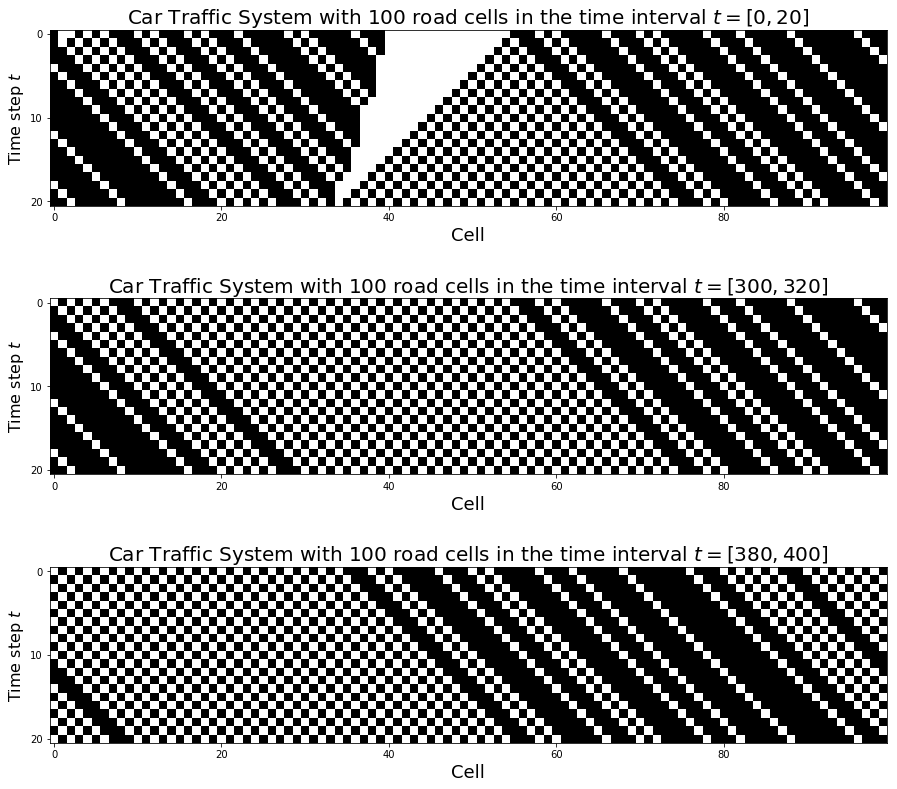

In [7]:
# Define figure instance and store time interval indexes to loop through
fig23 = plt.figure(figsize=(15,14))
T = [[0,21], [300, 321], [380, 401]]

# Loop through the time interval list to plot the positions of the cars over various time intervals
for idx, t in enumerate(T):
    # Define arrays of size (T x N) where N=100 (number of cells on road) and T is the number of time steps which will be
    # [0,20], [300,320] and [380,400]
    R = np.asarray(system[t[0]:t[1]])
    
    # Plot the positions of the cars depicted in white on the road depicted as black
    ax23 = fig23.add_subplot(3,1, idx+1)
    ax23.set_xlabel('Cell', fontsize=18)
    ax23.set_yticks([0,10,20])
    ax23.set_ylabel('Time step $t$', fontsize=16)
    ax23.set_title('Car Traffic System with 100 road cells in the time interval $t = [%i, %i]$'% (t[0],int(t[1]-1)), fontsize=20)
    ax23.imshow(R, cmap='gray')

The plots of the positions of the cars during 21 timesteps in the 100-cell road traffic system are shown above. The first plot shows the first 21 timesteps of the road. Because the cars positioned in the prime number indexes are quite sparse (since all even numbers greater than 2 are obviously not prime) each car has empty cells to it's left and right meaning that the car has freedom to move to the next cell (except for the first car at position 2). This means in each timestep, the car moves by one cell ($c$) and this pattern continues for subsequent timesteps for these initially-prime number-indexed cars. This suggests the possibility of there being a steady state solution given enough timesteps for the system to evolve in. The cars positioned in the interval (40, 55] are piled up in one long line of cells, but as time progresses we can see that the cars in this area begin to diffuse to a point where each of the cars positioned there now have an empty cell to their left and right so they can also continue to move one cell to the right for every timestep. This is because in the first timestep the car in the right-most cell of the pile-up can move freely to the right, and then in the second timestep the car to the left of that right-most car can also move and this pattern also continues until the pile-up is completely diffuse. This hypothesis suggested is verified in the second and third subplots: we can see for each timestep every single car is moving by one cell in a steady state fashion. Hence, the traffic does indeed reach a steady state by the end of the simulation.

Because at the end of the simulation each car is moving one cell for each timestep the average velocity of all of the cars will be $v = 1\textrm{ct}^{-1}$ (1 cell per timestep) to the right.

---

### Task 2b - Trajectory of the cars and average velocity

Storing `R[i,t]` at each time step is unnecessarily memory-consuming. Moreover, it is hard to track individual cars through the zeros and ones of `R[i,t]`. Instead, it is more efficient for many purposes to store the trajectories of each car in an array, `Traj[car,t]`, where each row records the trajectory for a different car, with the value in each successive column recording the location at each successive time step. Our next purpose is to use this array to calculate the average velocities of each car. So it is now better not to use the periodic boundary condition immediately, but to store the value of $N+1$ for the car that moves off the last cell (similarly storing the value of $N+2$ instead of 2 etc). For instance, for the 9-cell road shown in the previous figure `Traj` is constructed as below:

$$
\left(\begin{array}{ccc}
1 & 2 & 3 & 3\\
4 & 4 & 4 & 5\\
5 & 5 & 6 & 7\\
6 & 7 & 8 & 9\\
9 & 9 & 10& 11\\
\end{array}\right)
$$

To derive `Traj[:,t+1]` from `Traj[:,t]`, we only need the current column of `R` and not the entire matrix `R[0:N,0:t+1]`. Hence, we are going to only keep the vector `r[0:N]`, which is the current state of the road with empty cells represented by 0 and cells with a car by 1 (i.e. `r=R[:,t]`). Now write a new funtion **`new_position(r,Traj)`** that takes the vector `r` and the current position vector `Traj[:,t]`, and returns the next column `Traj[:,t+1]`. 

Using `Traj[:,t+1]` and [modular arithmetic](https://en.wikipedia.org/wiki/Modular_arithmetic) you can update `r` more easily. To update `r` from the state at `t` to `t+1` you will need to: 

- start a new array for `r` at `t+1` by filling `r[:]` values as zeros initially
- take each element of `Traj[:,t+1]`
- find the remainder when you divide that element by $N$, call it `j`
- set `r[j-1]=1`.

(Note what is happening here - you are storing the cars in cells 1 up to N in array positions indexed 0 up to N-1).

Write another function **`new_updateR(Traj[:,t+1])`** that takes the trajectory at `t+1` and returns a new vector `r` without using any `if` statements using this procedure outlined above. (Note here the size of `r` is $N$ and the size of `Traj` is $M \times T$).

The speed of car `i` at time `t` can be readily calculated as **`Traj[i,t]-Traj[i,t-1]`**, which is either 0 or 1 cell per step. Write the function **`ave_vel(Traj,t)`** that takes the array of trajectories and the time step and returns the average velocity of all cars at time `t`.   

Using the functions you have written; **`new_position()`**, **`new_updateR()`** and **`ave_vel()`**, complete the following list of tasks:

In [8]:
def new_position(Traj, r):
    '''r is a state vector of 0s and 1s that represent the current state of the traffic on the road. This is expected to be 
    an array (vector) of size Nx1.
    
    Traj is the position vector for current timestep t. This is expected to be a vector of size Mx1.
    
    This function outputs the next position vector for the cars in the next timestep, Traj_next at timestep t+1.'''
        
    # Store the number of cells in the road
    N = r.size
    
    # Check to make sure atleast 4 cells on the road.
    if N < 4:        
        print('Invalid number of cells on road for algorithm to work. Please input the traffic state array R with cell number greater than 3')
        return
        
    # Determine number of cars, M
    M = Traj.size
    
    # Initialise the trajectory vector of the next timestep and determine the next state of the cars
    Traj_next = Traj
    r_next = updateR(r)
    
    # Loop over the number of cars on the road
    for i in range(M):
        # If there was a car in the cell at the current timestep AND there isn't a car in that same cell in the next timestep
        # then this means the car has moved and therefore the position vector element is incremented for that car. Otherwise,
        # the value is not changed.
        if r[int(np.mod(Traj[i], N))-1] == 1 and r_next[int(np.mod(Traj[i], N))-1] == 0:
            Traj_next[i] += 1
        else:
            continue
            
    return Traj_next

In [9]:
def new_updateR(Traj, N):
    '''Traj is position vector of the cars at timestep t+1.
    
    N is the number of cells on the road.
        
    This function takes the position vector Traj at timestep t+1 and returns a new vector r that will be the state of the road
    at timestep t.'''
    
    # Initialise state vector and determine number of cars
    r = np.zeros((N))
    M = Traj.size
    
    # Loop over number of cars
    for m in range(M):
        # Calculate remainder of cell location that car is in during timestep t+1 with respect to N which gives the cell 
        # number of the road given the periodic boundary condition, without taking into account Python indexing.
        j = int(np.mod(Traj[m],N))
        
        # Therefore, taking into account python indexing, we assign the location on the road with a 1 to denote the cars position
        r[j-1] = 1
        
    return r

In [10]:
def ave_vel(Traj_M, t):
    '''Traj_M is the trajectory matrix that has the position vector for each timestep, where each element represents the cell 
    location for a car. This is expected to be an MxT array.
    
    t is the timestep at which you calculate the average velocity of all the cars using the previous cell locations the cars were
    in. This is meant to be a positive integer in the interval [1, T-1], due to python indexing.
    
    This function takes the array of trajectories Traj_M and a timestep t and returns the total average speed of the cars at
    timestep t.'''
    
    # Determine number of cars and total timesteps
    M,T = Traj_M.shape
    
    # Make sure t is a positive integer in the interval [1,T].
    if t > T-1 or t < 1 or t%1 != 0:
        print('Error. Invalid time input. Please enter a positive integer in the interval [1, %i]' % int(T-1))
        return  
    
    # Calculate average velocity of all cars as average of the difference in position of subsequent timesteps.
    vel = np.sum(Traj_M[:, t] - Traj_M[:, t-1])/M
    
    return vel

## Question 2b.1

1) Test your function **`new_position()`** by using the example above.

In [11]:
Traj_M = np.array([[1,2,3,3],[4,4,4,5],[5,5,6,7],[6,7,8,9],[9,9,10,11]])
r = np.array([1,0,0,1,1,1,0,0,1])
N = r.size

# Test function at each column of the array to determine the cell location of each car and print out the corresponding
# column in Traj_M to verify the function outputs the correct positions.
for t in range(Traj_M.shape[1]-1):
    if t==0:
        print('Initial position vector at timestep t=0:')
        print(Traj_M[:,t])
    print('')
    print("Function 'new_position(Traj_M, r, %i)' output:" % int(t+1))
    print(new_position(Traj_M[:,t], r))
    print('Ground truth Traj_M[:,%i]:' % int(t+1))
    print(Traj_M[:,t+1])
    print('Has the function predicted the next position correctly?', (new_position(Traj_M[:,t], r)==Traj_M[:,t+1]).all())
    r = new_updateR(Traj_M[:,t+1], N)

Initial position vector at timestep t=0:
[1 4 5 6 9]

Function 'new_position(Traj_M, r, 1)' output:
[2 4 5 7 9]
Ground truth Traj_M[:,1]:
[2 4 5 7 9]
Has the function predicted the next position correctly? True

Function 'new_position(Traj_M, r, 2)' output:
[ 3  4  6  8 10]
Ground truth Traj_M[:,2]:
[ 3  4  6  8 10]
Has the function predicted the next position correctly? True

Function 'new_position(Traj_M, r, 3)' output:
[ 3  5  7  9 11]
Ground truth Traj_M[:,3]:
[ 3  5  7  9 11]
Has the function predicted the next position correctly? True


## Question 2b.2 and 2b.3

2) Put $M = 15$ cars in the first ten cells of a road that has $N = 50$ cells. Plot the average speed of all cars as a function of time up to $T=50$. How long does it take to reach a steady average speed?

3) Repeat question 2) for $M = 25$ and $M = 35$ and discuss the results. Is the final average speed the same for all $M$? Which is the largest value of $M$ for which you can reach the maximum average speed?

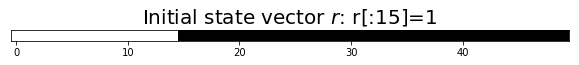

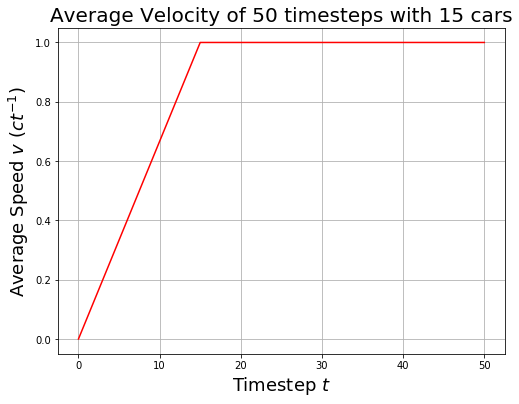

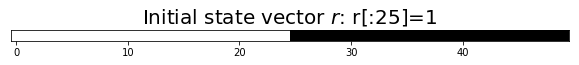

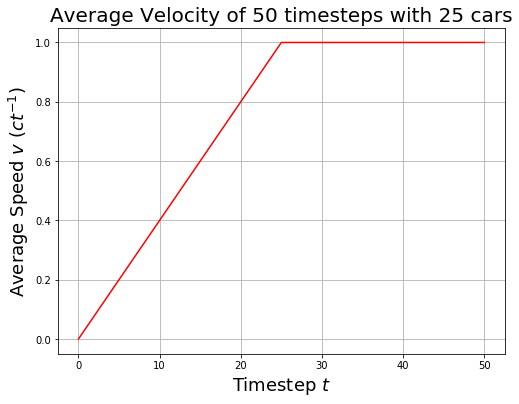

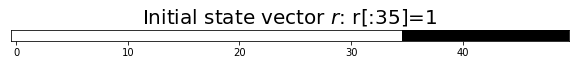

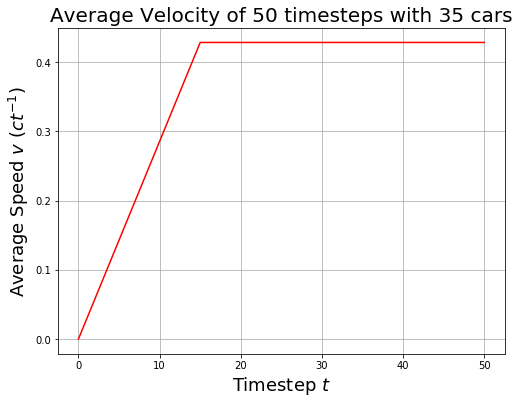

In [12]:
M = [15, 25, 35]
T = 51
N = 50

# Loop over car numbers
for m in M:
    # Build the trajectory matrix and initialise the first position vector 
    Traj_M = np.zeros((m,T))
    Traj_M[:,0] = np.array([i+1 for i in range(m)])
    r_initial = new_updateR(Traj_M[:,0], N)

    # Initialise the total average speed list
    avg_spd = [0]

    # Loop over all timesteps (so we can get to timestep t=50) and record results
    for t in range(1,T):
        if t == 1:
            r = r_initial
        Traj_M[:,t] = new_position(np.array(Traj_M[:,t-1]), r)
        r = new_updateR(Traj_M[:,t], N)
        avg_spd.append(ave_vel(Traj_M, t))

    # Plot initial state vector. White = cell with car. Black = cell without car.
    fig = plt.figure(figsize=(10,8))
    ax1 = plt.subplot(111)
    ax1.imshow(r_initial.reshape(1,-1), cmap='gray')
    ax1.set_yticks([])
    ax1.set_title('Initial state vector $r$: r[:%i]=1' % m, fontsize=20)    

    # Plot average speed over time
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.grid()
    ax.plot(np.arange(0,T,1), avg_spd, 'r-')
    ax.set_title('Average Velocity of %i timesteps with %i cars' % (int(T-1),m), fontsize=20)
    ax.set_ylabel('Average Speed $v$ ($ct^{-1}$)', fontsize=18)
    ax.set_xlabel('Timestep $t$', fontsize=18)

2) The answer to this question lies in the first plot in the above cell. Because the cars were initially placed in the first 15 cells of the road, in the first timestep only the last car (in position 15) can move one cell with a speed of $1ct^{-1}$ (one cell per timestep) meaning the total average speed is $\frac{1}{15}ct^{-1}$. This is because the remaining 14 cars have a car to their right stopping them from moving. In the next timestep that same car can move as well as the one behind it now each with a speed of $1ct^{-1}$ (resulting in a total average speed of $\frac{2}{15}ct^{-1}$). This process continues for the first 15 timesteps, reducing congestion and increasing the total average speed in a linear fashion. When time evolves past 15 timesteps, the total average speed reaches the maximum total average speed of $1ct^{-1}$ represented by the horizontal segment in the first plot. Therefore, it takes 15 timesteps before all the cars are moving at one cell per timestep which results in a total steady average speed of $1ct^{-1}$.

3) Denote the number of cars for the simulation as $M_0, M_1, M_2 = 15, 25, 35$. The plots for $M_1$ and  $M_2$ are below the plot for $M_0$. The plot for $M_0$ and $M_2$ are the same shape but **not** the same final average speed. For the $M_2$ simulation, denote all cars as $\{c_i\}_{i=1}^{35}$ (where $c_1$ is the first car in the leftmost cell of the road). It takes 15 timesteps before the car $c_35$ reaches the last cell of the road. At this point, $c_{35}$ can't move back to cell 1 on the road because $c_1$ is still present there after these 15 timesteps. $c_1$ has to wait for 35 timesteps before it can start to move because of congestion issues explained above. As a result for this simulation, congestion begins at the end of the road until $c_1$ moves which means for 15 timesteps the average velocity grows in a linear fashion **and** for every car $c_i$ that gets stuck at the end of the road, a car toward the beginning of the road, $c_j$, comes free begins to move with 1 cell per timestep which essentially cancels out any increment to the total average speed of all the cars for future timesteps. Therefore, after 15 timesteps, the total average velocity becomes constant at $\frac{15}{35}ct^{-1}$. This was because of the congestion initialisation made as well as the fact that there were more cars than half the number of cells. This is in stark contrast to the $M_1$ simulation which **does** reaches the maximum final average speed of all cars. This is because there are an equal number of cars as half the number of cells and so congestion doesn't occur since by 25 timesteps the left-most initial car is free to move one cell at the same time that the right-most car is free to circle back to cell 1. Hence, the largest value of $M$ for which you can reach the maximum average speed **using the initial state vector configuration of the first M cells being filled with cars** is $M_1=25$.

## Question 2b.4

4) Does the average speed of the cars depend on their initial configuration? To answer this question, initally fill $M = 20$ cars in $N=50$ cells in three different ways:

a) Fill the first 20 cells with 20 cars.

b) Use `random.sample(range(0,N),M)` to randomly distribute the cars (you will need to import `random` to use this function).

c) Put them in pairs with one cell space between the pairs. That is, fill the cells 1,2,4,5,7,8,10,11,... 

Plot the average speed of the cars as a function of time up to $T=50$ for each case and discuss the results.

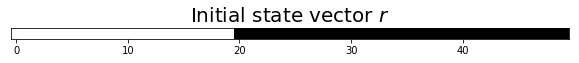

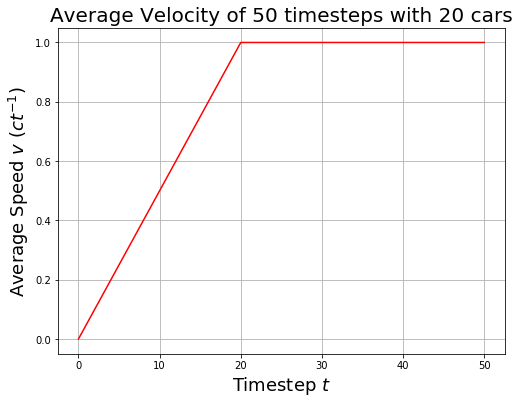

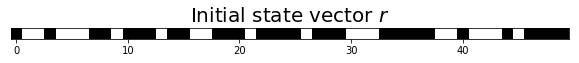

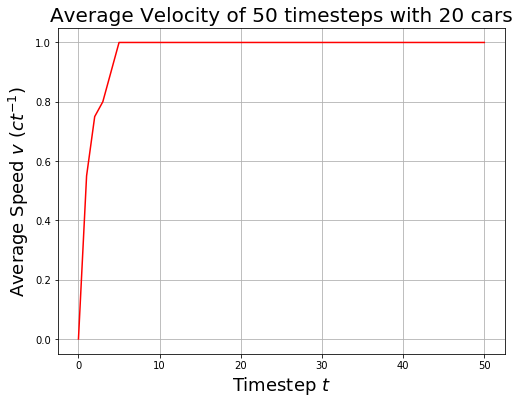

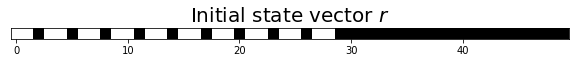

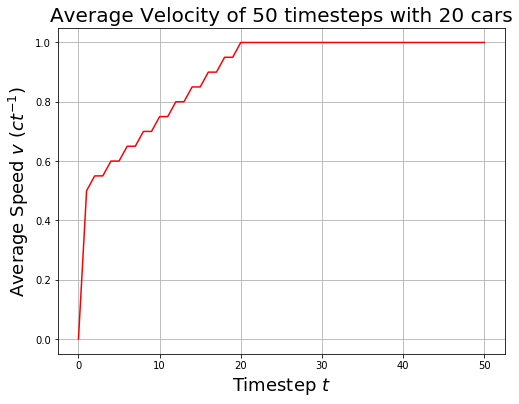

In [13]:
# Define number of cars, number of cells on the road and number of timesteps
N, T, M = 50, 51, 20

# Define the initial state vectors satisfying the (a), (b) and (c) conditions above
r_a = np.hstack([np.ones((M)), np.zeros((N-M))])

r_b = np.zeros((N))
np.random.seed(42)
r_b[random.sample(range(0,N),M)] = 1

r_c = np.zeros((N))
# Initialise counter so it only fills cells with cars up to M. 
count=0
for i in range(0,N):
    j = i+1
    # Only put a 1 in a position with an index non-divisible by 3 until M is reached.
    if j%3 != 0 and count < M:
        count += 1
        r_c[i] = 1
        
#Store initial state vectors to loop
R = [r_a, r_b, r_c]

for r in R:
    #Plot the initial state vector: 1 = Car in cell, 0 = No car in cell
    fig = plt.figure(figsize=(10,8))
    ax1 = plt.subplot(111)
    ax1.imshow(r.reshape(1,-1), cmap='gray')
    ax1.set_yticks([])
    ax1.set_title('Initial state vector $r$', fontsize=20)
    
    # Initialise trajectory matrix and initial position vector.
    Traj_M = np.zeros((M,T))
    Traj_M[:,0] = np.array(np.where(r==1))+1

    # Initialise the total average speed list
    avg_spd = [0]

    # Loop over all timesteps (so we can get to timestep t=50) and record results
    for t in range(1,T):
        Traj_M[:,t] = new_position(np.array(Traj_M[:,t-1]), r)
        r = new_updateR(Traj_M[:,t], N)
        avg_spd.append(ave_vel(Traj_M, t))
    
    # Plot average speed over time
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.grid()
    ax.plot(np.arange(0,T,1), avg_spd, 'r-')
    ax.set_title('Average Velocity of %i timesteps with 20 cars' % int(T-1), fontsize=20)
    ax.set_ylabel('Average Speed $v$ ($ct^{-1}$)', fontsize=18)
    ax.set_xlabel('Timestep $t$', fontsize=18)

4) The average speed of the cars **does** depend on their initial configuration as seen in the 3 plots above. In all the above plots, the final average speed is reached (and plateaus) for each setting. The first plot shows the average speed increasing in a linear fashion until it plateau's after 20 timesteps at the maximum average speed which is expected based on questions 2 and 3. When we randomly sample the cars on the road then those consecutive cells with cars in them will take a few timesteps before they eventually space themselves out until a maximum average speed of $1ct^{-1}$ is also reached. Because this is random, the average speeds for the first $\approx$10-20 timesteps will be different each until the cars have spaced out, but they will always be increasing/flat depending on how congested the random initialisation is. The last plot of the total average speed using pairwise initialisation increases at a constant rate for 20 timesteps (as there are 20 cars) because each initial pair of cars can have their right car move a cell during timestep $t=1$. Then, in timestep $t=2$, the left cars in the initial pairs can move freely **aswell** as the farthest, right-most car on the road hence increasing the total average speed in timestep $t=2$ by $\frac{1}{20}ct^{-1}$ so that the total becomes $\frac{11}{20}ct^{-1}$ as indicated by the last plot down. This pattern continues for 20 timesteps until a maximum total average speed is reached. However, interpreting the question to whether the initial configuration has an effect on the **final** average speed then no, it doesn't. This is because the number of cars initialised on the road is **less than half** of the number of cells on the road.

## Question 2b.5

5) Repeat the previous question for $M = 30$ cars. Does the average speed reach the same limit?

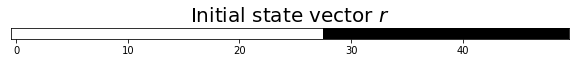

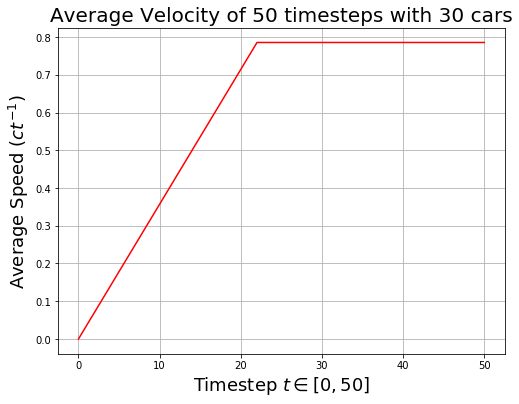

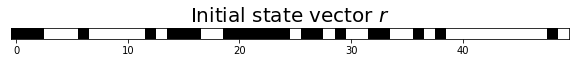

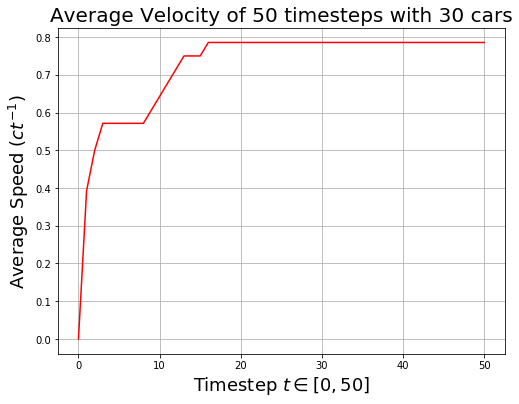

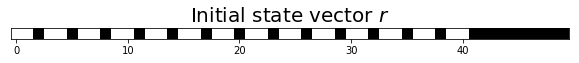

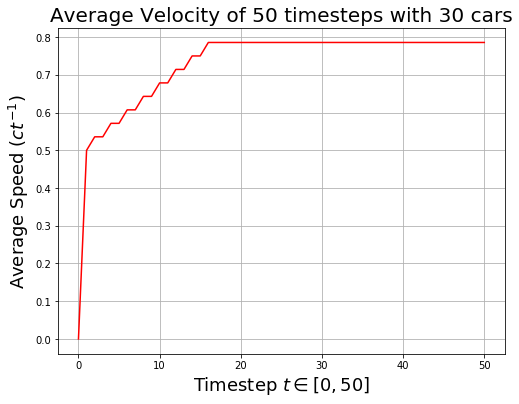

In [14]:
# Define number of cars and number of cells on the road 
# Note that M > 34 will return an error because of the last state vector in (c) since only 17 pairs of cars can fit on a 50-cell 
#road with a space in between them. 
N, M, T = 50, 28, 51

# Define the initial state vectors satisfying the (a), (b) and (c) conditions above
r_a = np.hstack([np.ones((M)), np.zeros((N-M))])

np.random.seed(42)
r_b = np.zeros((N))
r_b[random.sample(range(0,N),M)] = 1

r_c = np.zeros((N))
#Initialise counter so it only fills cells with cars up to M
count=0
for i in range(0,N):
    j = i+1
    if j%3 != 0 and count < M:
        count += 1
        r_c[i] = 1
        
R = [r_a, r_b, r_c]

for r in R:
    #Plot the initial state vector: 1 = Car in cell, 0 = No car in cell
    fig = plt.figure(figsize=(10,8))
    ax1 = plt.subplot(111)
    ax1.imshow(r.reshape(1,-1), cmap='gray')
    ax1.set_yticks([])
    ax1.set_title('Initial state vector $r$', fontsize=20)
    
    Traj_M = np.zeros((M,T))
    Traj_M[:,0] = np.array(np.where(r==1))+1

    # Initialise the total average speed list
    avg_spd = [0]

    # Loop over all timesteps (so we can get to timestep t=50) and record results
    for t in range(1,T):
        Traj_M[:,t] = new_position(np.array(Traj_M[:,t-1]), r)
        r = new_updateR(Traj_M[:,t], N)
        avg_spd.append(ave_vel(Traj_M, t))
    
    # Plot average speed over time
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.grid()
    ax.plot(np.arange(0,T,1), avg_spd, 'r-')
    ax.set_title('Average Velocity of %i timesteps with 30 cars' % int(T-1), fontsize=20)
    ax.set_ylabel('Average Speed ($ct^{-1}$)', fontsize=18)
    ax.set_xlabel('Timestep $t \in [0,%i]$' % int(T-1), fontsize=18)   

5) For simulations with the same number of cars, the final average speed is the same. This is because once the cars have been initialised, as time evolves, the cars space themselves as much as they can until the simulation gets to a point where for every car that can move during a timestep, this increment in total average speed is cancelled by another car not being able to move (because there isn't a free space to their right). This stagnates the final average speed, $v_f$, to the value:
\begin{equation}v_f = \begin{cases}
\frac{N-M}{M} & \textrm{if $M>\frac{N}{2}$}\\ \\\
            1 & \textrm{if $M\leq\frac{N}{2}$}\\
\end{cases}\end{equation}
The speed limit is less than 1 for cases **only** when the number of cars is greater than half the number of cells on the road, due to the natural congestion issue that takes place.

## Question 2b.6 and 2b.7

6) How does the number of cars affect the final average speed? In other words, we want to see how traffic fluidity depends on how busy the road is. Use `scipy.stats.bernoulli.rvs(p, size=N) ` to fill each cell in the inital configuration (see workshop 5 if you are not familiar with this function). This means the chance of having a car in a cell is `p`.  Therefore, if `N` is large enough, you expect to have `N*p` cars on the road. Set $N=800$, vary `p` from $0.2$ to $0.8$, and plot the average speed of cars at `T=200` as a function of `p`. Comment on the results. How does the number of cars affect their final average speed?

7) Repeat the last question for $N=50$ and $N = 2000$. Do the results change? Why?

In [15]:
# speed limit function
def s_f(N,M):
    if M > N/2:
        return (N-M)/M
    else:
        return 1

In [16]:
# Define the number of cells on road
N = 800

def avg_spds_t200(N, T, fit_line=False):
    '''N is the number of cells on the road.
    
    T is the number of timesteps.
    
    fit_line is a boolean value that determines whether the velocity limit function is superimposed onto the final average speed
    plot. It is automatically set to False.
    
    This function will perform the tasks in Question 2b.6 and 2b.7 which is to plot the 200th total average speed given a
    Bernoulli generated initial state vector against varying probabilities. Each data points has a label representing how 
    many cars there are on the road for that particular setting, shown in the legend.'''
    
    # Set up list of probabilities 
    probs = np.arange(0.2, 0.9, 0.1)

    # Set up figure
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111)

    # Set up basic MatplotLib colours to use for plotting
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Initialise the total average speed list
    avg_spd = []

    # Initialise speed list s
    if fit_line:
        s=[]
        
    # Loop over probabilities
    for idx, p in enumerate(probs): 
        # Set up initial state vector of the traffic
        r = bernoulli.rvs(p, size=N)
        
        # Store the number of cars
        M = r[r == 1].size
        
        # Add speed calculated using speed limit function
        if fit_line:
            s.append(s_f(N, M))

        #Initialise the trajectory matrix and the first position vector
        Traj_M = np.zeros((M,T))
        Traj_M[:,0] = np.array(np.where(r==1))+1

        # Loop over all timesteps (so we can get to timestep t=200) and record results
        for t in range(1,T):
            Traj_M[:,t] = new_position(np.array(Traj_M[:,t-1]), r)
            r = new_updateR(Traj_M[:,t], N)
            avg_spd.append(ave_vel(Traj_M, t))

        # Set up plot
        ax.set_title('Final Average Speed after %i Timesteps\n of various Bernoulli generated State Vectors' % int(T-1),
                     fontsize=20)
        ax.set_xlabel('Probability $p$', fontsize=18)
        ax.set_ylabel('Average Speed $v$ $(ct^{-1})$', fontsize=18)
        ax.plot(p, avg_spd[-1], marker = 'P', 
                color = colours[idx], markersize=15,
                label = str(M)+' cars')
        
    # Fit speed limit function if fit_line = True
    if fit_line:
        ax.plot(probs, s, 'b-', label = 'Speed Function')

    # Place grid and initiate legend
    ax.grid()
    ax.legend(loc='lower left')

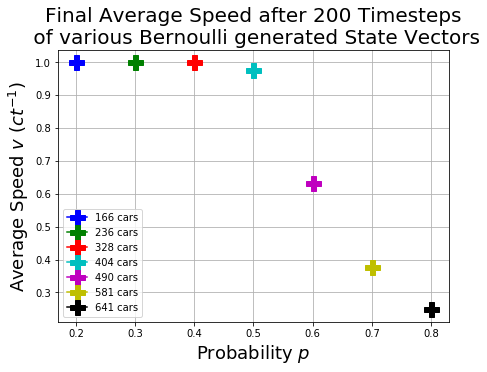

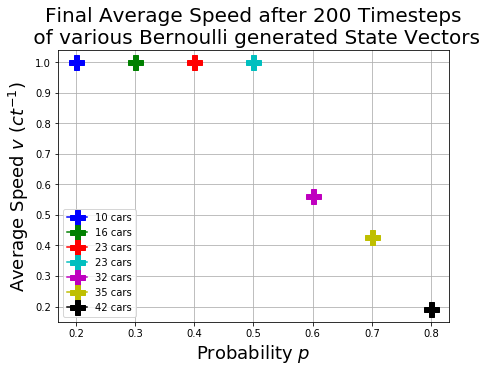

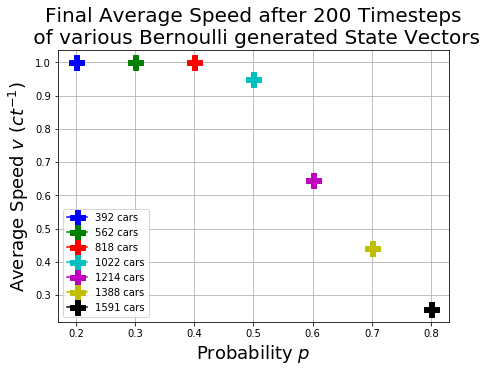

In [17]:
T = 201

avg_spds_t200(800, T, False)
avg_spds_t200(50, T, False)
avg_spds_t200(2000, T, False)

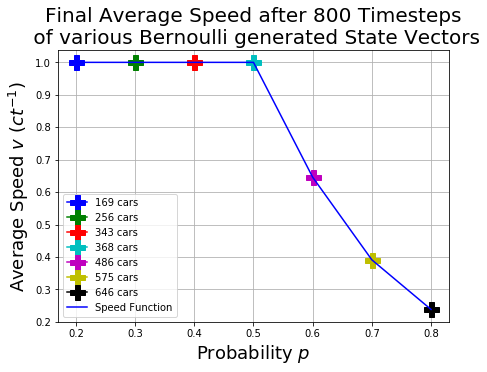

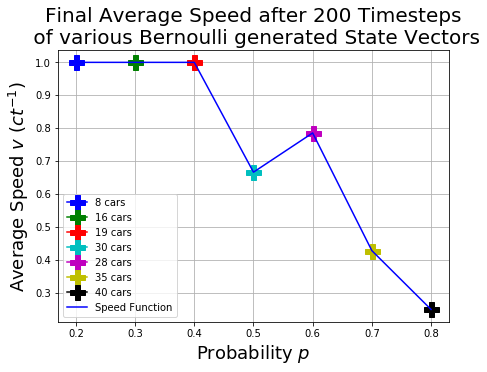

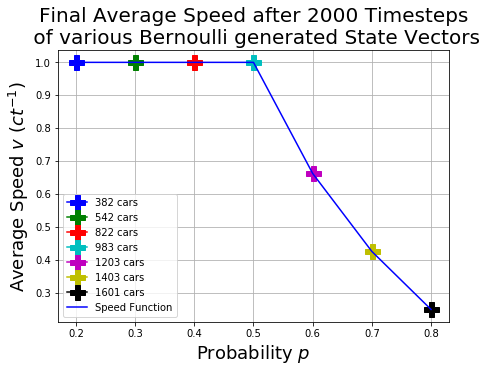

In [18]:
# In enough timesteps, the velocity function approximates the final average speeds correctly.

avg_spds_t200(800, 801, True)
avg_spds_t200(50, T, True)
avg_spds_t200(2000, 2001, True)

6) As seen from the plots above, the final average speed **definitely** depends on the number of cars on the road. After 200 timesteps, we can see that the number of cars corresponding to Bernoulli probabilities of under and including $p=\frac{1}{2}$ reach the maximum final average speed as opposed to the number of cars with Bernoulli probability greater than $p=\frac{1}{2}$. This is directly related to having a greater number of cars on the road than there are half the number of cells on the road. The legend shows the number of cars on the road. The randomisation of the state vector at the beginning coupled with the large number of cars on the road results in huge congestion problems at various points along the road meaning that alot of cars will not be moving. This decreases the final average speed during these 200 timesteps. However, in the next cell the simulation was run for 800 timesteps and the final speed function was superimposed on top mapping the number of cars and cells on the road to the final average speeds.

7) Inspecting the next 2 plots using 50- and 2000-cell roads shows the same pattern of final average speeds reaching a far higher value when the Bernoulli generator probability is less than $p=\frac{1}{2}$. When $p=0.5$ then depending on the number of cars the maximal final average speed of $1ct^{-1}$ can be reached, but this final average speed also depends on the number of timesteps in order to get to the convergent final average speed. However, over all three simulations the results don't change massively and the pattern we can see is: a maximum final average speed of $1ct^{-1}$ is reached when the number of cars are in the interval $[0, \frac{N}{2}]$. This maximum depends on the length of the simulation and number of cars (generall if there are more timesteps than number of cells on the road then the final average speed can reach $1ct^{-1}$. Then, for the number of cars in the interval $(\frac{N}{2}, N]$, the final average speed decreases in a approximately-linear fashion dictated by the speed function defined in question 2c.5. 

---

### Task 2c - Fast and slow cars

Now imagine there are two types of cars on our road: fast cars who want to move with the speed of 2 cells per step if there are enough spaces in front of them, and the slow cars who always move with the speed of 1 cell per step as in the previous task. If there are less than two free cells in front of the fast cars, they either move one cell per step or don't move at all (like slow cars).

## Task 2c

In [19]:
def new_position2(r, Traj, Vel):
    '''r is the state vector at timestep t.  This is expected to be a vector of size Nx1.
    
    Traj is the position vector for timestep t, where each element represents the cell location. This is expected to be an array
    of size Mx1.
    
    Vel stores the velocity of each car. This defines whether a car is fast or not. Fast = 2, Slow = 1. 
    
    This function will take in the position vector and state vector at timestep t and output the new position vector at timestep
    t+1 taking into account whether a car is fast or not using the Vel vector.
    '''
    # Store the number of cells in the road.
    N = r.size
    
    # Check to make sure atleast 4 cells on the road.
    if N < 4:        
        print('Invalid number of cells on road for algorithm to work. Please input the traffic state array R with cell number greater than 3')
        return
    
    # Store the number of cars on the road and initialise the trajectory vector 
    M = Traj.size
    Traj_next = Traj
        
    # Loop over number of cars
    for m in range(M):
        #Store position on road.
        pos_id = int(np.mod(Traj[m],N))-1
        
        # Check if fast car and if there are one or two free spaces to the right and incremenent position accordingly
        if Vel[m] == 2:
            if (r[int(np.mod(pos_id+1,N))] == 0) and (r[int(np.mod(pos_id+2,N))] == 0):
                Traj_next[m] += 2
            elif (r[int(np.mod(pos_id+1,N))] == 0) and (r[int(np.mod(pos_id+2,N))] != 0):
                Traj_next[m] += 1
            else:
                continue
                
        #Check if slow car and if there is one free space to the right
        else:
            if r[int(np.mod(pos_id+1,N))] == 0:
                Traj_next[m] += 1
            else:
                continue
                
    return Traj_next

In [20]:
def question_2c(r, T, Vel):
    '''r is the current state vector at timestep t.
    
    T is the total number of timesteps to run the simulation for.
        
    Vel is the velocity vector that determines whether a car is fast (1=slow, 2=fast).
    
    This function performs the tasks in Question 2c - since they are asking for the same thing except for slightly different
    initialisation of slow-fast cars and timestep length indicated by the function arguments Vel and T. Hence, this function
    plots the positions of the cars on the road after T timesteps.
    '''

    # Determine number of cars
    M = r[r==1].size
    N = r.size

    #Initialise Trajectory matrix, the state vector list
    Traj_M = np.zeros((M,T))
    R = np.zeros((T,N))
    Traj_M[:,0] = np.array(np.where(r==1))+1
    R[0,:] = r

    # Loop over timesteps and record position and state vectors to compute average speeds
    for t in range(1,T):
        Traj_M[:,t] = new_position2(R[t-1,:], Traj_M[:,t-1], Vel)
        R[t,:] = new_updateR(Traj_M[:,t], N)
                
    # Plot the positions of the cars depicted in white on the empty cells depicted as black
    fig2c = plt.figure(figsize=(10,8))
    ax2c = fig2c.add_subplot(111)
    ax2c.set_xlabel('Cells on the road', fontsize=18)
    ax2c.set_ylabel('Time step $t$', fontsize=16)
    ax2c.set_title('Car Traffic System with 100 road cells in the time interval $t = [0, %i]$'% int(T-1), fontsize=20)
    ax2c.imshow(R, cmap='gray')
    
    # Only return trajectory matrix to calculate average speed of final timestep in question 2c.3
    return Traj_M

## Question 2c.1

1) Numbering your cells from $1$ to $N=100$, put all fast cars initially in the prime indexed cells and the cells in the interval $(60,85]$. Now plot the position of the cars in the time interval $t=[0, 60]$. Do you think a part of road will stay congested forever? In which direction is the congested part of the traffic flow moving?

(You will find it helpful to construct a new function to help **`new_position2(r,Traj,Vel)`**, where the new vector `Vel` stores the velocity of each car).

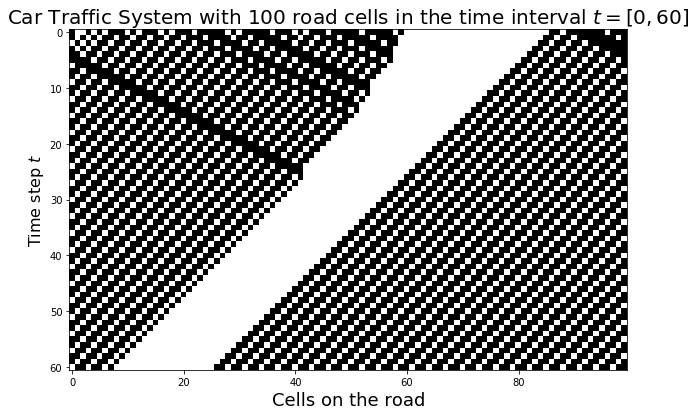

In [21]:
# Define number of cells on the road and number of timesteps.
T = 61
N = 100

# Initialise state vector of traffic taking care to account for python indexing.
r = np.zeros((N))
M_idx = primes()
r[M_idx-1] = 1 
r[61:86] = 1

# Define number of cars on road.
M = r[r==1].size

# Define velocity vector.
Vel = [2 for i in range(M)]

# Run function to plot positions of the car in the time interval t=[0,60].
_ = question_2c(r, T, Vel)

The above plot shows how the traffic is flowing on the road for 60 timesteps, where a white square represents a car and a black square represents an empty cell. We can see that the initial congestion in the traffic decreases in length but gets to a repetitive point where the right-most car of the congestion pile-up can move two cells but the car to the left of the congestion pile-up can only move 1 cell which means the pile-up moves one cell **to the left**, for every timestep. This pile-up will continue for the simulation indefinitely because at **each** timestep, after roughly $t=25$, every car outside of the pile-up is moving at a constant speed of $2ct^{-1}$ **except** the car that's two cells to the left of the pile-up, which only travels at $1ct^{-1}$ therefore moving the pile-up one cell to the left.

## Question 2c.2

2) Now put fast cars initially in the prime indexed cells only like those in the last question, but this time make the last car (in cell 97) slow (i.e. moving only one cell per step). How does this car affect the whole traffic flow?

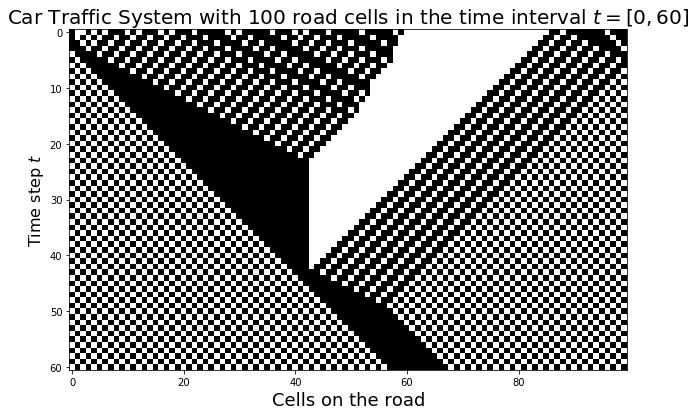

In [22]:
# Define timestep length and velocity vector 
T = 61
Vel = [2 for i in range(M)]
Vel[-1] = 1

# Run function to plot positions of the car in the time interval t=[0,60]
_ = question_2c(r, T, Vel)

2) By adding one slow car into the mix, we can see that the congestion pile-up diffuses until it is no more. This is single-handedly due to the slow car initially at position 97. Because this car only moves one cell per timestep (if possible), all the fast cars behind it are forced to move only one cell per timestep when it reaches the slow car. While this is happening, all the fast cars that were initially behind the congestion pile-up move their two cells per timestep (if possible) and become part of the pile-up while the right-most car of the pile-up moves 2 cells to catch up to the slow car (hence why the pile-up looks to be travelling to the left, as explained in question 1). This process continues until the first left-most fast car, initially placed in position 2, reaches and ends the pile-up. Since the slow car can't speed up to the first fast car, there is a period on the road that is completely empty for the remainder of the simulation (($\approx t>43$)). For the rest of the simulation, every fast car is stuck behind the slow car, all moving with speed $1ct^{-1}$. Therefore, the effect of the slow car on the whole traffic flow is such that it forces the fast cars to become slow cars and allows the system to reach a steady state solution.

## Question 2c.3

3) By running the simulation up to $T = 100$, calculate the average velocity of the cars at this final time.

The final average speed after 100 timesteps using one slow car (using Traj_M) is: 1.0c/t.

This matches the final average speed obtained using the limit function: 1c/t.


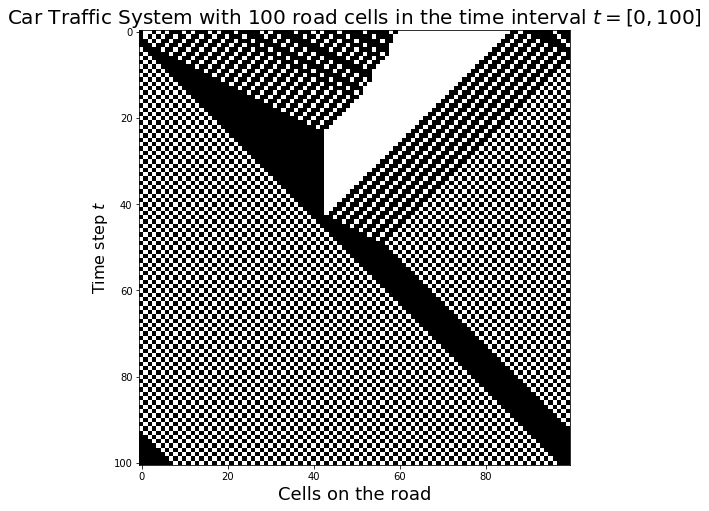

In [24]:
# Define timestep length and velocity vector 
T = 101
Vel = [2 for i in range(M)]
Vel[-1] = 1

# Run function to plot positions of the car in the time interval t=[0,60]
Traj_M = question_2c(r, T, Vel)
vf_L = s_f(N,M)
vf = np.sum(Traj_M[:,-2] - Traj_M[:,-3])/M
print('The final average speed after 100 timesteps using one slow car (using Traj_M) is: {}c/t.'.format(vf))
print('')
print('This matches the final average speed obtained using the limit function: {}c/t.'.format(vf_L))
